In [1]:
import os
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [2]:
DATA_PATH = './data'
COLLECTORS = ['bryan', 'chris', 'jiayu', 'jurgen']

In [3]:
super_df = pd.DataFrame(columns=['timestamp', 'bssid', 'ssid', 'signal_strength', 'device_idx'])
for root, dirs, files in tqdm(os.walk(DATA_PATH)):
    path = root.split(os.sep)
    for file in files:
        device_idx = COLLECTORS.index(path[1])
        if file.endswith('.csv'):
            print(f'Processing {file} from {path[1]}')
            df = pd.read_csv(os.path.join(root, file), header=None, names=['timestamp', 'bssid', 'ssid', 'signal_strength'])
            df['device_idx'] = device_idx
            super_df = pd.concat([super_df, df], ignore_index=True)
super_df.head()

0it [00:00, ?it/s]

Processing wifi_signal_strength.csv from bryan
Processing wifi_signal_strength.csv from chris
Processing wifi_signal_strength.csv from jiayu
Processing wifi_signal_strength.csv from jurgen


,timestamp,bssid,ssid,signal_strength,device_idx
0,20240228113709,88:9C:AD:72:B7:8D,SIT-POLY,87,0
1,20240228113709,88:9C:AD:E1:1D:4D,SIT-POLY,74,0
2,20240228113709,88:9C:AD:E0:D1:4D,SIT-POLY,65,0
3,20240228113709,88:9C:AD:E0:30:2D,SIT-POLY,64,0
4,20240228113709,88:9C:AD:E0:88:CD,SIT-POLY,59,0


In [4]:
super_df['bssid'].unique()

array(['88:9C:AD:72:B7:8D', '88:9C:AD:E1:1D:4D', '88:9C:AD:E0:D1:4D',
       '88:9C:AD:E0:30:2D', '88:9C:AD:E0:88:CD', '88:9C:AD:70:34:CD',
       '88:9C:AD:70:53:6D', '88:9C:AD:E1:5E:4D', '88:9C:AD:71:0F:2D',
       '88:9C:AD:71:51:8D', '88:9C:AD:E1:20:2D', '88:9C:AD:6F:C4:ED',
       '88:9C:AD:77:CA:2D', '88:9C:AD:71:16:4D', '88:9C:AD:77:05:AD',
       '88:9C:AD:77:7D:0D', '88:9C:AD:77:CA:22', '88:9C:AD:71:0B:ED',
       '88:9C:AD:E1:22:6D', '88:9C:AD:70:BF:2D', '88:9C:AD:77:05:A2',
       '88:9C:AD:71:0B:E2', '88:9C:AD:E0:30:22', '88:9C:AD:70:BF:22',
       '88:9C:AD:E1:1D:42', '88:9C:AD:E1:5E:42', '88:9C:AD:71:16:42'],
      dtype=object)

In [5]:
super_df.head()

,timestamp,bssid,ssid,signal_strength,device_idx
0,20240228113709,88:9C:AD:72:B7:8D,SIT-POLY,87,0
1,20240228113709,88:9C:AD:E1:1D:4D,SIT-POLY,74,0
2,20240228113709,88:9C:AD:E0:D1:4D,SIT-POLY,65,0
3,20240228113709,88:9C:AD:E0:30:2D,SIT-POLY,64,0
4,20240228113709,88:9C:AD:E0:88:CD,SIT-POLY,59,0


In [6]:
super_df[super_df['timestamp'].isna()]

,timestamp,bssid,ssid,signal_strength,device_idx


In [7]:
super_df['timestamp'] = super_df['timestamp'].apply(int).apply(str)

In [8]:
super_df[super_df['timestamp'].str.len() != 14]

,timestamp,bssid,ssid,signal_strength,device_idx


In [9]:
super_df['timestamp'] = pd.to_datetime(super_df['timestamp'], format='%Y%m%d%H%M%S')

In [10]:
common_bssids = []
for device_idx in range(4):
    bssids = super_df[super_df['device_idx'] == device_idx]['bssid'].unique()
    common_bssids.append(bssids)
common_bssids = set.intersection(*map(set, common_bssids))
print(common_bssids)

{'88:9C:AD:E1:20:2D', '88:9C:AD:71:51:8D', '88:9C:AD:71:0F:2D', '88:9C:AD:77:05:AD', '88:9C:AD:77:CA:2D', '88:9C:AD:70:34:CD', '88:9C:AD:E0:88:CD', '88:9C:AD:E0:30:2D', '88:9C:AD:77:7D:0D', '88:9C:AD:E1:1D:4D', '88:9C:AD:E0:D1:4D'}


In [11]:
super_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        839 non-null    datetime64[ns]
 1   bssid            839 non-null    object        
 2   ssid             839 non-null    object        
 3   signal_strength  839 non-null    object        
 4   device_idx       839 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 32.9+ KB


In [12]:
super_df[super_df['device_idx'] == 1]['timestamp'].unique()

<DatetimeArray>
['2024-02-28 11:39:29', '2024-02-28 12:03:29', '2024-02-28 12:32:37',
 '2024-02-28 13:00:52', '2024-02-28 13:31:02', '2024-02-28 13:59:23',
 '2024-02-28 14:29:33', '2024-02-28 15:00:24', '2024-02-28 15:29:32',
 '2024-02-28 15:59:35', '2024-03-07 12:34:28', '2024-03-07 13:31:15',
 '2024-03-07 13:48:10', '2024-03-07 14:02:39', '2024-03-07 14:17:48',
 '2024-03-07 14:34:20']
Length: 16, dtype: datetime64[ns]

In [13]:
corrections = {
    '2024-02-28 10:24:39': '2024-02-28 11:39:29',
    '2024-02-28 10:47:32': '2024-02-28 12:03:29',
    '2024-02-28 11:16:59': '2024-02-28 12:32:37'
}

In [14]:
for ts, correct_ts in corrections.items():
    super_df.loc[super_df['timestamp'] == datetime.datetime.strptime(ts, '%Y-%m-%d %H:%M:%S'), 'timestamp'] = datetime.datetime.strptime(correct_ts, '%Y-%m-%d %H:%M:%S')

<Axes: xlabel='timestamp', ylabel='Count'>

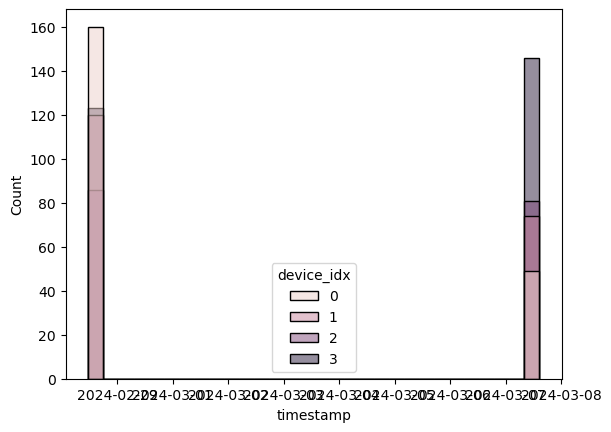

In [15]:
sns.histplot(super_df, x='timestamp', bins=30, hue='device_idx')

In [16]:
bins = pd.date_range('2024-02-28 11:20:00', '2024-02-28 16:20:00', freq='30 min')
bins

DatetimeIndex(['2024-02-28 11:20:00', '2024-02-28 11:50:00',
               '2024-02-28 12:20:00', '2024-02-28 12:50:00',
               '2024-02-28 13:20:00', '2024-02-28 13:50:00',
               '2024-02-28 14:20:00', '2024-02-28 14:50:00',
               '2024-02-28 15:20:00', '2024-02-28 15:50:00',
               '2024-02-28 16:20:00'],
              dtype='datetime64[ns]', freq='30T')

In [17]:
super_df['binned_timestamp'] = pd.cut(super_df['timestamp'], bins=bins)

In [18]:
super_df['binned_timestamp'].unique()

[(2024-02-28 11:20:00, 2024-02-28 11:50:00], (2024-02-28 11:50:00, 2024-02-28 12:20:00], (2024-02-28 12:20:00, 2024-02-28 12:50:00], (2024-02-28 12:50:00, 2024-02-28 13:20:00], (2024-02-28 13:20:00, 2024-02-28 13:50:00], ..., (2024-02-28 14:20:00, 2024-02-28 14:50:00], (2024-02-28 14:50:00, 2024-02-28 15:20:00], (2024-02-28 15:20:00, 2024-02-28 15:50:00], (2024-02-28 15:50:00, 2024-02-28 16:20:00], NaN]
Length: 11
Categories (10, interval[datetime64[ns], right]): [(2024-02-28 11:20:00, 2024-02-28 11:50:00] < (2024-02-28 11:50:00, 2024-02-28 12:20:00] < (2024-02-28 12:20:00, 2024-02-28 12:50:00] < (2024-02-28 12:50:00, 2024-02-28 13:20:00] ... (2024-02-28 14:20:00, 2024-02-28 14:50:00] < (2024-02-28 14:50:00, 2024-02-28 15:20:00] < (2024-02-28 15:20:00, 2024-02-28 15:50:00] < (2024-02-28 15:50:00, 2024-02-28 16:20:00]]

In [19]:
pivoted_table = super_df.pivot_table(index=['binned_timestamp'], columns=['bssid', 'device_idx'], values=['signal_strength'], observed=True, fill_value=0, aggfunc='mean', dropna=False)
pivoted_table

signal_strength                  
bssid                                      88:9C:AD:6F:C4:ED                  
device_idx                                                 0  1     2     3   
binned_timestamp                                                              
(2024-02-28 11:20:00, 2024-02-28 11:50:00]              30.0  0  79.0  24.0  \
(2024-02-28 11:50:00, 2024-02-28 12:20:00]              27.0  0  65.0  40.0   
(2024-02-28 12:20:00, 2024-02-28 12:50:00]              34.0  0  70.0  19.0   
(2024-02-28 12:50:00, 2024-02-28 13:20:00]              22.0  0  59.0   0.0   
(2024-02-28 13:20:00, 2024-02-28 13:50:00]              29.0  0   0.0   0.0   
(2024-02-28 13:50:00, 2024-02-28 14:20:00]              53.0  0   0.0  35.0   
(2024-02-28 14:20:00, 2024-02-28 14:50:00]              52.0  0  69.0  24.0   
(2024-02-28 14:50:00, 2024-02-28 15:20:00]               0.0  0   0.0  24.0   
(2024-02-28 15:20:00, 2024-02-28 15:50:00]              51.5  0  70.0  20.0   
(2024-02-28 15:50:00, 2024-02-28 16:20:00]              54.0  0   0.0  24.0   

                                                                           
bssid                                      88:9C:AD:70:34:CD               
device_idx                                                 0     1     2   
binned_timestamp                                                           
(2024-02-28 11:20:00, 2024-02-28 11:50:00]              54.0  24.0  29.0  \
(2024-02-28 11:50:00, 2024-02-28 12:20:00]              47.0  24.0   0.0   
(2024-02-28 12:20:00, 2024-02-28 12:50:00]              50.0  24.0   0.0   
(2024-02-28 12:50:00, 2024-02-28 13:20:00]              47.0  27.0   0.0   
(2024-02-28 13:20:00, 2024-02-28 13:50:00]              54.0  24.0   0.0   
(2024-02-28 13:50:00, 2024-02-28 14:20:00]               0.0  25.0   0.0   
(2024-02-28 14:20:00, 2024-02-28 14:50:00]              49.0  24.0   0.0   
(2024-02-28 14:50:00, 2024-02-28 15:20:00]               0.0   0.0   0.0   
(2024-02-28 15:20:00, 2024-02-28 15:50:00]              51.0  24.0   0.0   
(2024-02-28 15:50:00, 2024-02-28 16:20:00]              54.0  29.0   0.0   

                                                                       ...   
bssid                                            88:9C:AD:70:53:6D     ...   
device_idx                                     3                 0  1  ...   
binned_timestamp                                                       ...   
(2024-02-28 11:20:00, 2024-02-28 11:50:00]   0.0              52.0  0  ...  \
(2024-02-28 11:50:00, 2024-02-28 12:20:00]   0.0              57.0  0  ...   
(2024-02-28 12:20:00, 2024-02-28 12:50:00]  27.0              50.0  0  ...   
(2024-02-28 12:50:00, 2024-02-28 13:20:00]  25.0              62.0  0  ...   
(2024-02-28 13:20:00, 2024-02-28 13:50:00]  32.0              55.0  0  ...   
(2024-02-28 13:50:00, 2024-02-28 14:20:00]   0.0              59.0  0  ...   
(2024-02-28 14:20:00, 2024-02-28 14:50:00]  22.0              60.5  0  ...   
(2024-02-28 14:50:00, 2024-02-28 15:20:00]  30.0              52.0  0  ...   
(2024-02-28 15:20:00, 2024-02-28 15:50:00]  30.0              59.5  0  ...   
(2024-02-28 15:50:00, 2024-02-28 16:20:00]  27.0              55.0  0  ...   

                                                                     
bssid                                      88:9C:AD:E1:22:6D         
device_idx                                                 2     3   
binned_timestamp                                                     
(2024-02-28 11:20:00, 2024-02-28 11:50:00]              75.0  62.0  \
(2024-02-28 11:50:00, 2024-02-28 12:20:00]               0.0  70.0   
(2024-02-28 12:20:00, 2024-02-28 12:50:00]               0.0  69.0   
(2024-02-28 12:50:00, 2024-02-28 13:20:00]               0.0  67.0   
(2024-02-28 13:20:00, 2024-02-28 13:50:00]               0.0  69.0   
(2024-02-28 13:50:00, 2024-02-28 14:20:00]               0.0  65.0   
(2024-02-28 14:20:00, 2024-02-28 14:50:00]              62.0  67.0   
(2024-02-2

In [20]:
tabular = pd.DataFrame(pivoted_table.to_records())

In [21]:
population = [56, 128, 99, 109, 75, np.nan, 23, 38, 34, 21]
tabular['population'] = population
tabular.dropna(inplace=True)

In [22]:
tabular

,binned_timestamp,"('signal_strength', '88:9C:AD:6F:C4:ED', 0)","('signal_strength', '88:9C:AD:6F:C4:ED', 1)","('signal_strength', '88:9C:AD:6F:C4:ED', 2)","('signal_strength', '88:9C:AD:6F:C4:ED', 3)","('signal_strength', '88:9C:AD:70:34:CD', 0)","('signal_strength', '88:9C:AD:70:34:CD', 1)","('signal_strength', '88:9C:AD:70:34:CD', 2)","('signal_strength', '88:9C:AD:70:34:CD', 3)","('signal_strength', '88:9C:AD:70:53:6D', 0)",...,"('signal_strength', '88:9C:AD:E1:22:6D', 3)","('signal_strength', '88:9C:AD:E1:5E:42', 0)","('signal_strength', '88:9C:AD:E1:5E:42', 1)","('signal_strength', '88:9C:AD:E1:5E:42', 2)","('signal_strength', '88:9C:AD:E1:5E:42', 3)","('signal_strength', '88:9C:AD:E1:5E:4D', 0)","('signal_strength', '88:9C:AD:E1:5E:4D', 1)","('signal_strength', '88:9C:AD:E1:5E:4D', 2)","('signal_strength', '88:9C:AD:E1:5E:4D', 3)",population
0,"(2024-02-28 11:20:00, 2024-02-28 11:50:00]",30.0,0,79.0,24.0,54.0,24.0,29.0,0.0,52.0,...,62.0,0,0,69.0,0,52.0,0,0.0,0,56.0
1,"(2024-02-28 11:50:00, 2024-02-28 12:20:00]",27.0,0,65.0,40.0,47.0,24.0,0.0,0.0,57.0,...,70.0,0,0,65.0,0,54.0,0,69.0,0,128.0
2,"(2024-02-28 12:20:00, 2024-02-28 12:50:00]",34.0,0,70.0,19.0,50.0,24.0,0.0,27.0,50.0,...,69.0,0,0,74.0,0,55.0,0,57.0,0,99.0
3,"(2024-02-28 12:50:00, 2024-02-28 13:20:00]",22.0,0,59.0,0.0,47.0,27.0,0.0,25.0,62.0,...,67.0,0,0,0.0,0,45.0,0,67.0,0,109.0
4,"(2024-02-28 13:20:00, 2024-02-28 13:50:00]",29.0,0,0.0,0.0,54.0,24.0,0.0,32.0,55.0,...,69.0,0,0,0.0,0,60.0,0,0.0,0,75.0
6,"(2024-02-28 14:20:00, 2024-02-28 14:50:00]",52.0,0,69.0,24.0,49.0,24.0,0.0,22.0,60.5,...,67.0,0,0,69.0,0,58.0,0,59.0,0,23.0
7,"(2024-02-28 14:50:00, 2024-02-28 15:20:00]",0.0,0,0.0,24.0,0.0,0.0,0.0,30.0,52.0,...,0.0,0,0,0.0,0,52.0,0,0.0,0,38.0
8,"(2024-02-28 15:20:00, 2024-02-28 15:50:00]",51.5,0,70.0,20.0,51.0,24.0,0.0,30.0,59.5,...,0.0,0,0,69.0,0,62.5,0,60.0,0,34.0
9,"(2024-02-28 15:50:00, 2024-02-28 16:20:00]",54.0,0,0.0,24.0,54.0,29.0,0.0,27.0,55.0,...,0.0,0,0,0.0,0,60.0,0,0.0,0,21.0


In [23]:
tabular.columns[1]

"('signal_strength', '88:9C:AD:6F:C4:ED', 0)"

C:\Users\melty\AppData\Local\Temp\ipykernel_15656\1976388438.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '88:9C:AD:72:B7:8D'),
 Text(1, 0, '88:9C:AD:E1:1D:4D'),
 Text(2, 0, '88:9C:AD:E0:D1:4D'),
 Text(3, 0, '88:9C:AD:E0:30:2D'),
 Text(4, 0, '88:9C:AD:E0:88:CD'),
 Text(5, 0, '88:9C:AD:70:34:CD'),
 Text(6, 0, '88:9C:AD:70:53:6D'),
 Text(7, 0, '88:9C:AD:E1:5E:4D'),
 Text(8, 0, '88:9C:AD:71:0F:2D'),
 Text(9, 0, '88:9C:AD:71:51:8D'),
 Text(10, 0, '88:9C:AD:E1:20:2D'),
 Text(11, 0, '88:9C:AD:6F:C4:ED'),
 Text(12, 0, '88:9C:AD:77:CA:2D'),
 Text(13, 0, '88:9C:AD:71:16:4D'),
 Text(14, 0, '88:9C:AD:77:05:AD'),
 Text(15, 0, '88:9C:AD:77:7D:0D'),
 Text(16, 0, '88:9C:AD:77:CA:22'),
 Text(17, 0, '88:9C:AD:71:0B:ED'),
 Text(18, 0, '88:9C:AD:E1:22:6D'),
 Text(19, 0, '88:9C:AD:70:BF:2D'),
 Text(20, 0, '88:9C:AD:77:05:A2'),
 Text(21, 0, '88:9C:AD:71:0B:E2'),
 Text(22, 0, '88:9C:AD:E0:30:22'),
 Text(23, 0, '88:9C:AD:70:BF:22'),
 Text(24, 0, '88:9C:AD:E1:1D:42'),
 Text(25, 0, '88:9C:AD:E1:5E:42'),
 Text(26, 0, '88:9C:AD:71:16:42')]

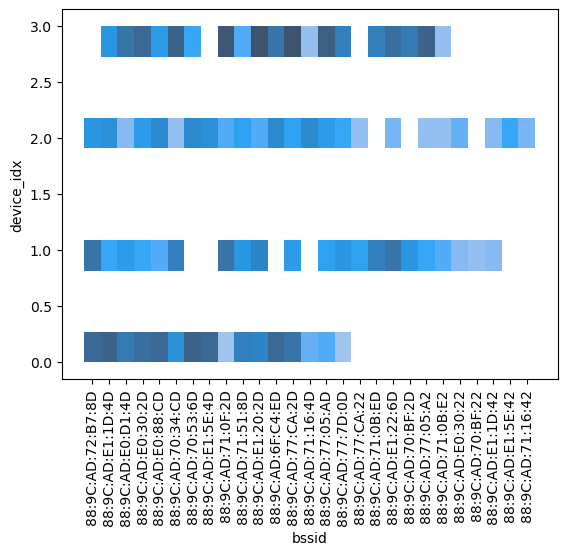

In [24]:
ax = sns.histplot(super_df, x='bssid', y='device_idx')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [25]:
super_df['binned_timestamp'][0].left + datetime.timedelta(minutes=10)

Timestamp('2024-02-28 11:30:00')

In [26]:
super_df.info()
super_df['binned_timestamp_str'] = super_df['binned_timestamp'].apply(lambda x: x.left + datetime.timedelta(minutes=10)).apply(datetime.datetime.strftime, format='%Y-%m-%d %H:%M:%S')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         839 non-null    datetime64[ns]
 1   bssid             839 non-null    object        
 2   ssid              839 non-null    object        
 3   signal_strength   839 non-null    object        
 4   device_idx        839 non-null    object        
 5   binned_timestamp  489 non-null    category      
dtypes: category(1), datetime64[ns](1), object(4)
memory usage: 34.2+ KB


C:\Users\melty\AppData\Local\Temp\ipykernel_15656\936762956.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '88:9C:AD:72:B7:8D'),
 Text(1, 0, '88:9C:AD:E1:1D:4D'),
 Text(2, 0, '88:9C:AD:E0:D1:4D'),
 Text(3, 0, '88:9C:AD:E0:30:2D'),
 Text(4, 0, '88:9C:AD:E0:88:CD'),
 Text(5, 0, '88:9C:AD:70:34:CD'),
 Text(6, 0, '88:9C:AD:70:53:6D'),
 Text(7, 0, '88:9C:AD:E1:5E:4D'),
 Text(8, 0, '88:9C:AD:71:0F:2D'),
 Text(9, 0, '88:9C:AD:71:51:8D'),
 Text(10, 0, '88:9C:AD:E1:20:2D'),
 Text(11, 0, '88:9C:AD:6F:C4:ED'),
 Text(12, 0, '88:9C:AD:77:CA:2D'),
 Text(13, 0, '88:9C:AD:71:16:4D'),
 Text(14, 0, '88:9C:AD:77:05:AD'),
 Text(15, 0, '88:9C:AD:77:7D:0D'),
 Text(16, 0, '88:9C:AD:77:CA:22'),
 Text(17, 0, '88:9C:AD:71:0B:ED'),
 Text(18, 0, '88:9C:AD:E1:22:6D'),
 Text(19, 0, '88:9C:AD:70:BF:2D'),
 Text(20, 0, '88:9C:AD:77:05:A2'),
 Text(21, 0, '88:9C:AD:71:0B:E2'),
 Text(22, 0, '88:9C:AD:E0:30:22'),
 Text(23, 0, '88:9C:AD:70:BF:22'),
 Text(24, 0, '88:9C:AD:E1:1D:42'),
 Text(25, 0, '88:9C:AD:E1:5E:42'),
 Text(26, 0, '88:9C:AD:71:16:42')]

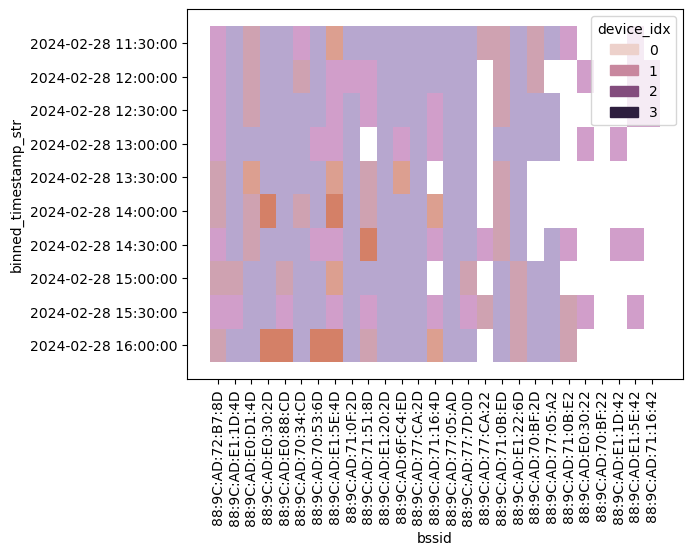

In [27]:
ax = sns.histplot(super_df, x='bssid', y='binned_timestamp_str', hue='device_idx')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# MLR

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold

In [29]:
FOLDS = 3

In [30]:
[1 + i * 4 for i in range(26)]

[1,
 5,
 9,
 13,
 17,
 21,
 25,
 29,
 33,
 37,
 41,
 45,
 49,
 53,
 57,
 61,
 65,
 69,
 73,
 77,
 81,
 85,
 89,
 93,
 97,
 101]

In [31]:
tabular[tabular.columns[[1 + 3 + i * 4 for i in range(26)]]]

,"('signal_strength', '88:9C:AD:6F:C4:ED', 3)","('signal_strength', '88:9C:AD:70:34:CD', 3)","('signal_strength', '88:9C:AD:70:53:6D', 3)","('signal_strength', '88:9C:AD:70:BF:22', 3)","('signal_strength', '88:9C:AD:70:BF:2D', 3)","('signal_strength', '88:9C:AD:71:0B:E2', 3)","('signal_strength', '88:9C:AD:71:0B:ED', 3)","('signal_strength', '88:9C:AD:71:0F:2D', 3)","('signal_strength', '88:9C:AD:71:16:42', 3)","('signal_strength', '88:9C:AD:71:16:4D', 3)",...,"('signal_strength', '88:9C:AD:77:CA:2D', 3)","('signal_strength', '88:9C:AD:E0:30:22', 3)","('signal_strength', '88:9C:AD:E0:30:2D', 3)","('signal_strength', '88:9C:AD:E0:88:CD', 3)","('signal_strength', '88:9C:AD:E0:D1:4D', 3)","('signal_strength', '88:9C:AD:E1:1D:42', 3)","('signal_strength', '88:9C:AD:E1:1D:4D', 3)","('signal_strength', '88:9C:AD:E1:20:2D', 3)","('signal_strength', '88:9C:AD:E1:22:6D', 3)","('signal_strength', '88:9C:AD:E1:5E:42', 3)"
0,24.0,0.0,30.0,0,0.0,0,0.0,65.0,0,24.0,...,45.0,0,69.0,42.0,0.0,0,34.0,42.0,62.0,0
1,40.0,0.0,49.0,0,0.0,0,0.0,0.0,0,37.0,...,64.0,0,70.0,52.0,0.0,0,65.0,52.0,70.0,0
2,19.0,27.0,25.0,0,49.0,0,0.0,62.0,0,0.0,...,40.0,0,64.0,39.0,0.0,0,42.0,40.0,69.0,0
3,0.0,25.0,0.0,0,49.0,0,49.0,55.0,0,0.0,...,44.0,0,62.0,44.0,47.0,0,44.0,42.0,67.0,0
4,0.0,32.0,29.0,0,0.0,0,0.0,59.0,0,0.0,...,47.0,0,62.0,39.0,0.0,0,42.0,39.0,69.0,0
6,24.0,22.0,0.0,0,0.0,0,0.0,52.0,0,0.0,...,39.0,0,57.0,44.0,0.0,0,42.0,37.0,67.0,0
7,24.0,30.0,32.0,0,44.0,0,55.0,57.0,0,0.0,...,45.0,0,54.0,0.0,50.0,0,0.0,37.0,0.0,0
8,20.0,30.0,29.0,0,45.0,0,50.0,62.0,0,0.0,...,49.0,0,49.0,0.0,47.0,0,0.0,37.0,0.0,0
9,24.0,27.0,0.0,0,47.0,0,50.0,62.0,0,0.0,...,45.0,0,0.0,0.0,47.0,0,37.0,39.0,0.0,0


In [32]:
# X = tabular.drop(columns=['binned_timestamp', 'population'])
# Get only 1st device
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = LinearRegression().fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: 0.3807112668912448
device_idx 1: 0.9739944134757673
device_idx 2: 0.1798369690425311
device_idx 3: -2.7917007137737464


In [33]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: 0.8873195857962028


In [34]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = LinearRegression().fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[0.49212274429140157, 0.7758010337773927, 0.003316653584075624]

# Polynomial Regression

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold

In [36]:
FOLDS = 3

In [37]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(x_train)
    reg = LinearRegression().fit(X_poly, y_train)
    print(f"device_idx {device_idx}: {reg.score(poly_reg.transform(x_test), y_test)}")

device_idx 0: -160.682024826457
device_idx 1: -0.6914399144617851
device_idx 2: -3.1616709205003053
device_idx 3: -5.578495707065129


In [38]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x_train)
reg = LinearRegression().fit(X_poly, y_train)
print(f"all devices: {reg.score(poly_reg.transform(x_test), y_test)}")

all devices: 0.8430400177153712


In [39]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(x_train)
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = LinearRegression().fit(X_poly, y_train)
    scores.append(reg.score(poly_reg.transform(x_test), y_test))

scores

[0.45277661573577244, 0.7079013774528691, -0.14642144024398895]

# Support Vector Regression (SVR)

In [40]:
from sklearn.svm import SVR

In [41]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = SVR(kernel = 'rbf').fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: -0.27367838647889764
device_idx 1: -0.24679794922850617
device_idx 2: -0.27098659144607096
device_idx 3: -0.2904180254652169


In [42]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = SVR(kernel = 'rbf').fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: -0.26442973027344685


In [43]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = SVR(kernel = 'rbf').fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[0.002734159148866766, 0.004416695837261786, -0.9945561706018842]

# Decision Tree Regression

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = DecisionTreeRegressor(random_state = 42).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: 0.8909008601177003
device_idx 1: -1.5337256677229516
device_idx 2: -2.768673607967406
device_idx 3: -1.213897691263015


In [46]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = DecisionTreeRegressor(random_state = 42).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: -1.52286102308737


In [47]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = DecisionTreeRegressor(random_state = 42).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[-0.8841957761985786, 0.7936230618038873, -1.1923076923076925]

# Random Forest Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = RandomForestRegressor(n_estimators = 55, random_state = 42).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: 0.5570693893126915
device_idx 1: -0.07753757169206343
device_idx 2: -1.0138461365787594
device_idx 3: -0.8907430533991301


In [50]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = RandomForestRegressor(n_estimators = 55, random_state = 42).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: -0.13498191096528522


In [51]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = RandomForestRegressor(n_estimators = 55, random_state = 42).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[0.11937194714912835, 0.5429238402408407, 0.003846481540951907]

# KRR

In [52]:
from sklearn.kernel_ridge import KernelRidge

In [53]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = KernelRidge(alpha=1.0).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: -0.02469111085187814
device_idx 1: 0.9175442565492857
device_idx 2: 0.2926384255212431
device_idx 3: -1.874077508896859


In [54]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = KernelRidge(alpha=1.0).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: 0.8716330283136664


In [55]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = KernelRidge(alpha=1.0).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[0.4818768466806428, 0.8462828415205992, 0.009571805709653991]

# LRR

In [56]:
from sklearn.linear_model import RidgeCV

In [57]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: 0.3805782266245046
device_idx 1: 0.9739456712975032
device_idx 2: 0.179698886950711
device_idx 3: -2.778794812253846


In [58]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: 0.8873195743459669


In [59]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[0.4898696798938097, 0.7758010376654365, 0.0033166511265984022]

# GPR

In [60]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [61]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    kernel = DotProduct() + WhiteKernel()
    reg = GaussianProcessRegressor(kernel=kernel, random_state=42).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: 0.16970125658814073
device_idx 1: 0.7263710688150611
device_idx 2: 0.1157065396214052
device_idx 3: -0.8398982803850457


In [62]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kernel = DotProduct() + WhiteKernel()
reg = GaussianProcessRegressor(kernel=kernel, random_state=42).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: 0.8716333331736785


In [63]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    kernel = DotProduct() + WhiteKernel()
    reg = GaussianProcessRegressor(kernel=kernel, random_state=42).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[0.4818770230571612, 0.846282020173462, 0.00957274631600269]

# Lasso

In [64]:
from sklearn.linear_model import LassoCV

In [65]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = LassoCV(cv=5, tol=0.1, random_state=42).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: -0.1969309226633158
device_idx 1: -0.19693092266331647
device_idx 2: -0.19693092266331647
device_idx 3: -1.7284770515359171


In [66]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LassoCV(cv=5, tol=0.1, random_state=42).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: -2.882221491162689


In [67]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = LassoCV(cv=5, random_state=42).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[0.7856209633953306, -0.08257807381524329, -0.2521908511240294]

# Elastic Net

In [68]:
from sklearn.linear_model import ElasticNetCV

In [69]:
for device_idx in range(4):
    X = tabular[tabular.columns[[1 + device_idx + i * 26 for i in range(4)]]]
    y = tabular['population']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = ElasticNetCV(cv=5, tol=0.001, random_state=42).fit(x_train, y_train)
    print(f"device_idx {device_idx}: {reg.score(x_test, y_test)}")

device_idx 0: -0.19693092266331647
device_idx 1: -0.19693092266331647
device_idx 2: -0.19693092266331647
device_idx 3: -0.19693092266331647


In [70]:
X = tabular.drop(columns=['binned_timestamp', 'population'])
y = tabular['population']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = ElasticNetCV(cv=5, tol=0.001, random_state=42).fit(x_train, y_train)
print(f"all devices: {reg.score(x_test, y_test)}")

all devices: 0.7481588678538417


In [71]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
scores = []
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg = ElasticNetCV(cv=5, tol=0.001, random_state=42).fit(x_train, y_train)
    scores.append(reg.score(x_test, y_test))

scores

[0.3199168376363939, -0.08257807381524329, -0.14619779790328247]